# ДЗ №1 Гладышев В.В.

## Задание № 1

1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени

Количественная оценка стоимости сопоставленная с шкалой времени является временным рядом.

б) скорость полета самолета при перелете из аэропорта А в аэропорт В

Абсолютное значение скорости не может быть временным рядом, но если взять отсчёты скорости на некотором интервале (с некоторой дискретой) и наложить на шкалу времени, то получится временной ряд.

в) количество отказов компьютера

Число, выражающее количество отказов, не является временным рядом. Однако, log-файл с журналом отказов в формате <дата/время>: <событие> содержит временной ряд.

г) число обращений в поликлинику по району

Число обращений в поликлинику это статистический параметр. Статистические данные собираются на определённом интервале (с указанием периода премени). Т.е. даже единственное значение количесва обращений (в случае указания года или месяца к которому оно относится) может расцениваться как вырожденный временной ряд.

д) координаты автобуса при движении по маршруту

Типичное навигационное определение содержит информацию о времени (и основано на точном сопоставлении событий с шкалой времени). Однако, координаты могут быть отделены от временных отсчётов. Набор координат будет являться временным рядом только при сопоставлении с временной шкалой.

е) координаты фигуры нарушителя в файле видеофиксации охранной системы

Видеоряд образован набором изображений получаемых с пределённой частотой. Камера видеофиксации это часть системы наблюдения, где видеоряд сопоставляется с временем (например, МСК). Координаты будут изменяться с течением времени, которое привязано к МСК. Это временной ряд...

## Задание № 2

2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error


Bad key "text.kerning_factor" on line 4 in
C:\Users\viv232\anaconda3\envs\r_l\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [4]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


#### Пропусков нет

In [5]:
data['DUQ_MW'] = data['DUQ_MW'].astype('int16')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   DUQ_MW  119068 non-null  int16
dtypes: int16(1)
memory usage: 1.1 MB


,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [6]:
data.head(5)

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458
2005-12-31 02:00:00,1377
2005-12-31 03:00:00,1351
2005-12-31 04:00:00,1336
2005-12-31 05:00:00,1356


In [7]:
data.tail(5)

,DUQ_MW
Datetime,
2018-01-01 20:00:00,1962
2018-01-01 21:00:00,1940
2018-01-01 22:00:00,1891
2018-01-01 23:00:00,1820
2018-01-02 00:00:00,1721


Text(0, 0.5, 'МВт')

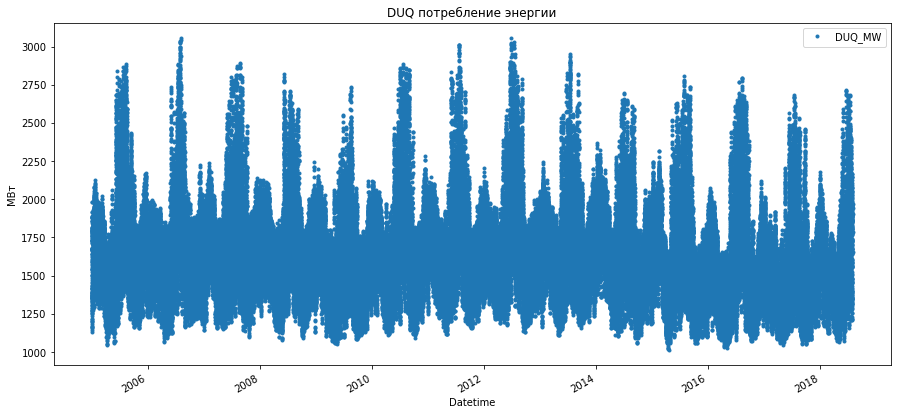

In [8]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )

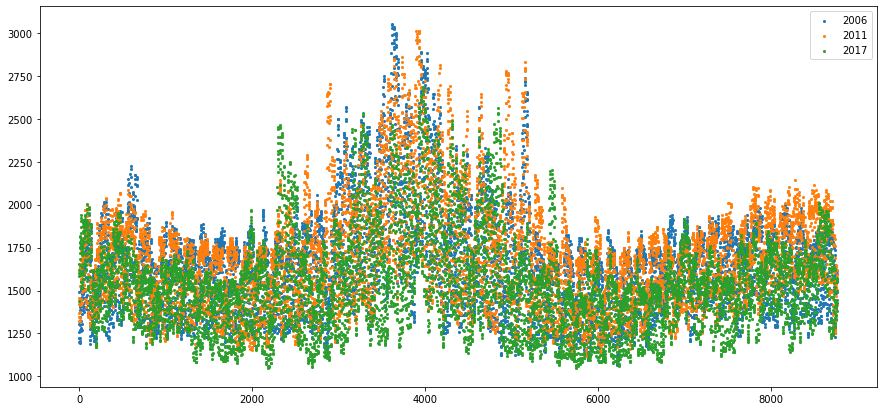

In [36]:
plt.figure(figsize=(15, 7))


plt.scatter(np.arange(data['2006-01-01 00:00:00':'2006-12-31 23:00:00'].shape[0]), 
                      data['2006-01-01 00:00:00':'2006-12-31 23:00:00'].values, marker = '.', linewidths = 0.1)
plt.scatter(np.arange(data['2011-01-01 00:00:00':'2011-12-31 23:00:00'].shape[0]), 
                      data['2011-01-01 00:00:00':'2011-12-31 23:00:00'].values, marker = '.', linewidths = 0.1)
plt.scatter(np.arange(data['2017-01-01 00:00:00':'2017-12-31 23:00:00'].shape[0]), 
                      data['2017-01-01 00:00:00':'2017-12-31 23:00:00'].values, marker = '.', linewidths = 0.1)

plt.legend(labels=["2006", "2011", "2017"])
plt.show()

Text(0, 0.5, 'МВт')

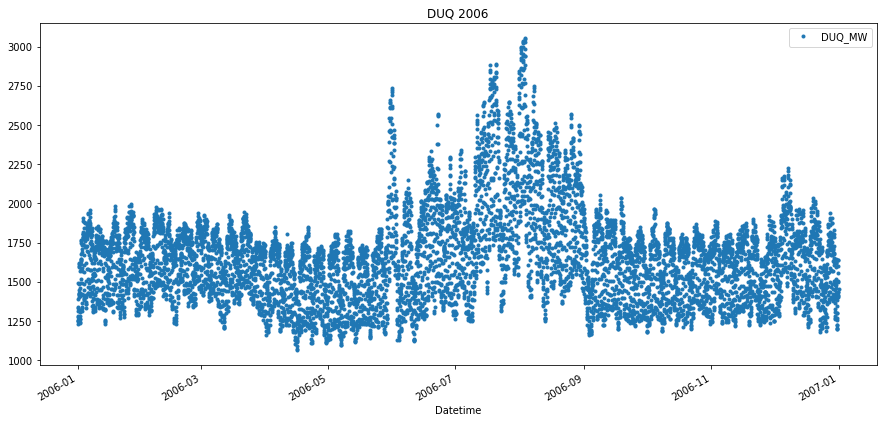

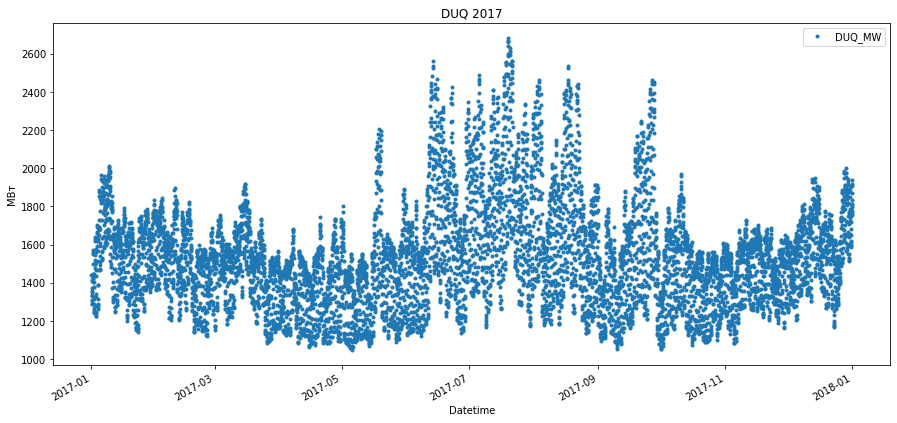

In [10]:
data['2006-01-01 00:00:00':'2006-12-31 23:00:00'].plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ 2006' )
# data['2007-01-01 00:00:00':'2007-12-31 23:00:00'].plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ 2007' )
# data['2016-01-01 00:00:00':'2016-12-31 23:00:00'].plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ 2016' )
data['2017-01-01 00:00:00':'2017-12-31 23:00:00'].plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ 2017' )
plt.ylabel ( 'МВт' )

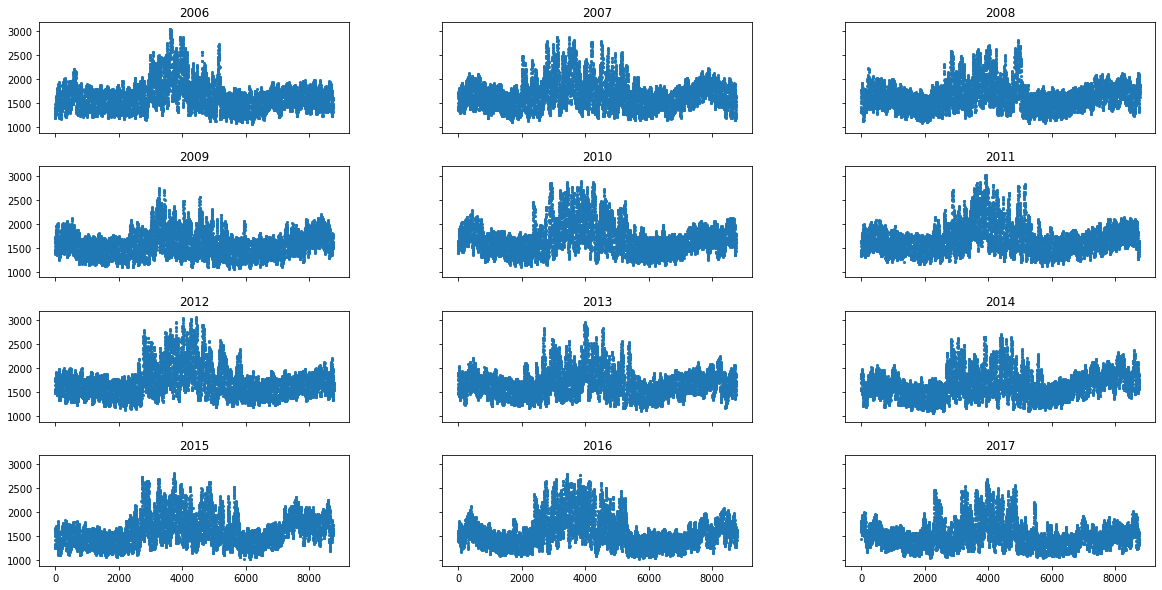

In [11]:
fig, ax = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True)
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12 = ax.flatten()

fig.set_size_inches(20, 10)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.set_title("2006")
ax1.scatter(np.arange(data['2006-01-01 00:00:00':'2006-12-31 23:00:00'].shape[0]), 
                      data['2006-01-01 00:00:00':'2006-12-31 23:00:00'].values, marker = '.', linewidths = 0.1)
ax2.set_title("2007")
ax2.scatter(np.arange(data['2007-01-01 00:00:00':'2007-12-31 23:00:00'].shape[0]), 
                      data['2007-01-01 00:00:00':'2007-12-31 23:00:00'].values, marker = '.', linewidths = 0.1)
ax3.set_title("2008")
ax3.scatter(np.arange(data['2008-01-01 00:00:00':'2008-12-31 23:00:00'].shape[0]), 
                      data['2008-01-01 00:00:00':'2008-12-31 23:00:00'].values, marker = '.', linewidths = 0.1)
ax4.set_title("2009")
ax4.scatter(np.arange(data['2009-01-01 00:00:00':'2009-12-31 23:00:00'].shape[0]), 
                      data['2009-01-01 00:00:00':'2009-12-31 23:00:00'].values, marker = '.', linewidths = 0.1)
ax5.set_title("2010")
ax5.scatter(np.arange(data['2010-01-01 00:00:00':'2010-12-31 23:00:00'].shape[0]), 
                      data['2010-01-01 00:00:00':'2010-12-31 23:00:00'].values, marker = '.', linewidths = 0.1)
ax6.set_title("2011")
ax6.scatter(np.arange(data['2011-01-01 00:00:00':'2011-12-31 23:00:00'].shape[0]), 
                      data['2011-01-01 00:00:00':'2011-12-31 23:00:00'].values, marker = '.', linewidths = 0.1)
ax7.set_title("2012")
ax7.scatter(np.arange(data['2012-01-01 00:00:00':'2012-12-31 23:00:00'].shape[0]), 
                      data['2012-01-01 00:00:00':'2012-12-31 23:00:00'].values, marker = '.', linewidths = 0.1)
ax8.set_title("2013")
ax8.scatter(np.arange(data['2013-01-01 00:00:00':'2013-12-31 23:00:00'].shape[0]), 
                      data['2013-01-01 00:00:00':'2013-12-31 23:00:00'].values, marker = '.', linewidths = 0.1)
ax9.set_title("2014")
ax9.scatter(np.arange(data['2014-01-01 00:00:00':'2014-12-31 23:00:00'].shape[0]), 
                      data['2014-01-01 00:00:00':'2014-12-31 23:00:00'].values, marker = '.', linewidths = 0.1)
ax10.set_title("2015")
ax10.scatter(np.arange(data['2015-01-01 00:00:00':'2015-12-31 23:00:00'].shape[0]), 
                      data['2015-01-01 00:00:00':'2015-12-31 23:00:00'].values, marker = '.', linewidths = 0.1)
ax11.set_title("2016")
ax11.scatter(np.arange(data['2016-01-01 00:00:00':'2016-12-31 23:00:00'].shape[0]), 
                      data['2016-01-01 00:00:00':'2016-12-31 23:00:00'].values, marker = '.', linewidths = 0.1)
ax12.set_title("2017")
ax12.scatter(np.arange(data['2017-01-01 00:00:00':'2017-12-31 23:00:00'].shape[0]), 
                      data['2017-01-01 00:00:00':'2017-12-31 23:00:00'].values, marker = '.', linewidths = 0.1)

#### Аномальных выбросов нет выявлена цикличность

In [12]:
data.index.value_counts().head(5)

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: Datetime, dtype: int64

#### Обнаружен переход на сезонное время

In [30]:
ls = [data['2006-01-01 00:00:00':'2006-12-31 23:00:00'].mean(),
      data['2007-01-01 00:00:00':'2007-12-31 23:00:00'].mean(),
      data['2008-01-01 00:00:00':'2008-12-31 23:00:00'].mean(),
      data['2009-01-01 00:00:00':'2009-12-31 23:00:00'].mean(),
      data['2010-01-01 00:00:00':'2010-12-31 23:00:00'].mean(),
      data['2011-01-01 00:00:00':'2011-12-31 23:00:00'].mean(),
      data['2012-01-01 00:00:00':'2012-12-31 23:00:00'].mean(),
      data['2013-01-01 00:00:00':'2013-12-31 23:00:00'].mean(),
      data['2014-01-01 00:00:00':'2014-12-31 23:00:00'].mean(),
      data['2015-01-01 00:00:00':'2015-12-31 23:00:00'].mean(),
      data['2016-01-01 00:00:00':'2016-12-31 23:00:00'].mean(),
      data['2017-01-01 00:00:00':'2017-12-31 23:00:00'].mean()]

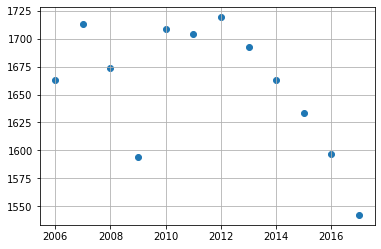

In [38]:
plt.scatter([i for i in range(2006, 2018)], ls)
plt.grid()
plt.show()

### Описание датасета

Массив из 119068 значений отдаваемой мощности региональной электросети в мегаваттах. Индекс дата/время с дискретностью один час. Начальная дата: 2005-12-31 01:00:00, конечная: 2018-01-02 00:00:00, т.е. полных 12 лет. Строк без значений нет. Минимальное значение: 1014, максимальное: 3054. Показатели округлены до целых значений. Можно преобразовать к типу int16. Выбросов не обнаружено.

Выявлены выраженные сезонные и недельные циклы. Для построения модели имеет смысл добавить климатические данные (погода, температура, природные явления (дожди, тайфуны), продолжительность светового дня). Также можно добавить общественно-политические события (календарь праздников и выходных, крупные спортивные события)

Обнаружен переход на сезонное время. Сдваивание индекса (2014-11-02, 2015-11-01, 2016-11-06, 2017-11-05). Соответственно весно д.б. пропуски значений при обратно переходе.

## Задание № 3

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [13]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [14]:
brent_data_w_mean = brent_data.resample("w").mean()
brent_data_w_mean.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


In [15]:
brent_data_w_std = brent_data.resample("w").std()
brent_data_w_std.head()

,Значение
Дата,
2010-09-05,0.185688
2010-09-12,0.649759
2010-09-19,0.539728
2010-09-26,0.596068
2010-10-03,2.408588


In [16]:
brent_data_m_mean = brent_data.resample("M").mean()
brent_data_m_mean.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


In [17]:
brent_data_m_std = brent_data.resample("M").std()
brent_data_m_std.head()

,Значение
Дата,
2010-09-30,1.294269
2010-10-31,0.898559
2010-11-30,1.753625
2010-12-31,1.443311
2011-01-31,1.842147


In [18]:
brent_data_y_mean = brent_data.resample("Y").mean()
brent_data_y_mean.head()

,Значение
Дата,
2010-12-31,84.963238
2011-12-31,110.758746
2012-12-31,111.377484
2013-12-31,108.137114
2014-12-31,99.435493


In [19]:
brent_data_y_std = brent_data.resample("Y").std()
brent_data_y_std.head()

,Значение
Дата,
2010-12-31,5.269065
2011-12-31,7.021114
2012-12-31,7.777702
2013-12-31,4.014836
2014-12-31,14.512923


In [20]:
print("brent_data")
brent_data.info()
print("\n\nbrent_data_w")
brent_data_w_mean.info()
print("\n\nbrent_data_m")
brent_data_m_mean.info()
print("\n\nbrent_data_y")
brent_data_y_mean.info()

brent_data
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Значение  2667 non-null   float64
dtypes: float64(1)
memory usage: 41.7 KB


brent_data_w
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 470 entries, 2010-09-05 to 2019-09-01
Freq: W-SUN
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Значение  469 non-null    float64
dtypes: float64(1)
memory usage: 7.3 KB


brent_data_m
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109 entries, 2010-09-30 to 2019-09-30
Freq: M
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Значение  109 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


brent_data_y
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2010-12-31 to 201

## Задание № 4

4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

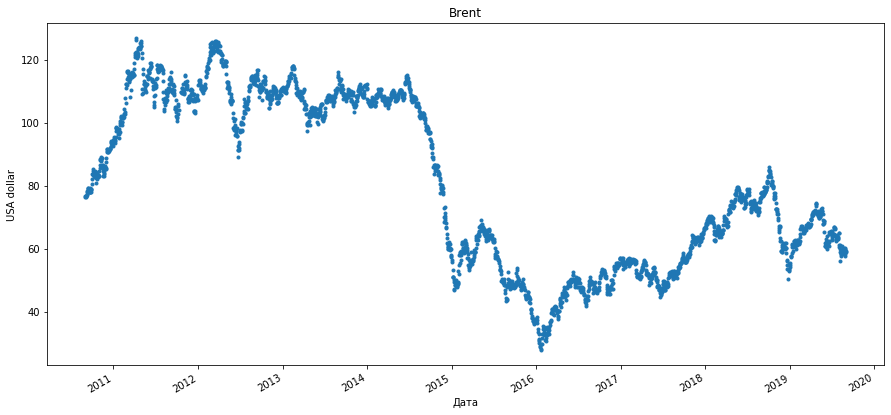

In [21]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent')
plt.ylabel('USA dollar')
plt.show()

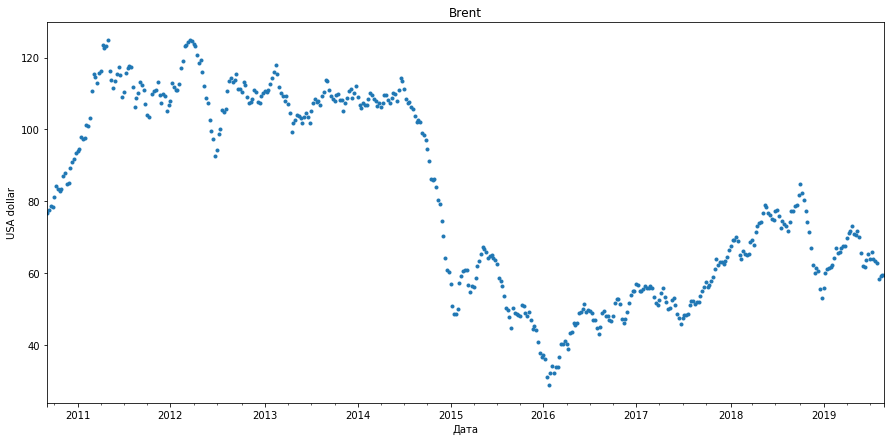

In [22]:
_ = brent_data_w_mean['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent')
plt.ylabel('USA dollar')
plt.show()

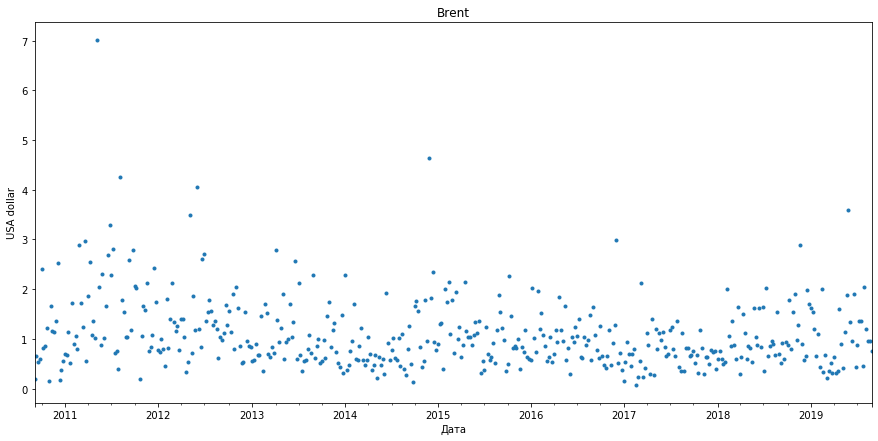

In [23]:
_ = brent_data_w_std['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent')
plt.ylabel('USA dollar')
plt.show()

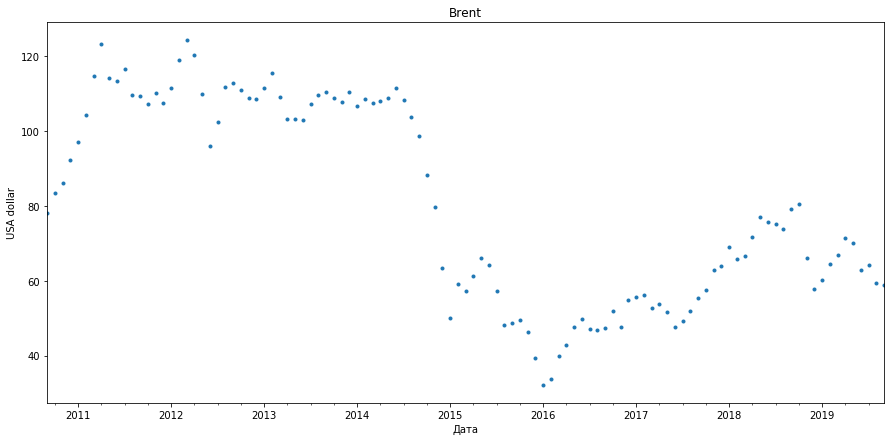

In [24]:
_ = brent_data_m_mean['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent')
plt.ylabel('USA dollar')
plt.show()

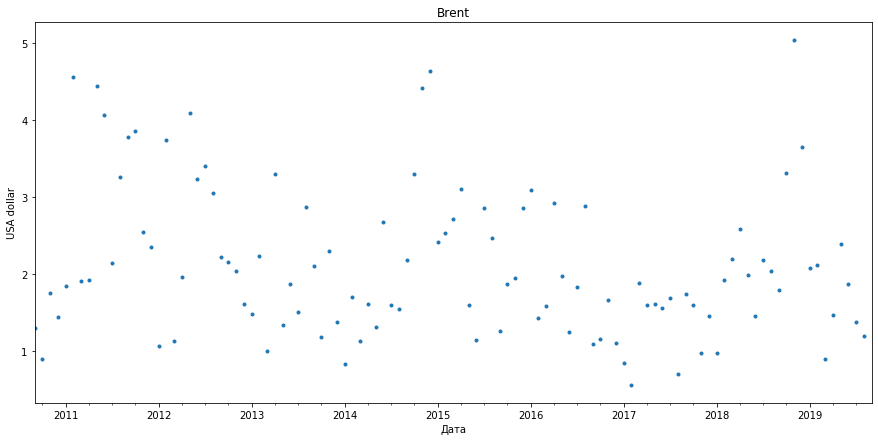

In [25]:
_ = brent_data_m_std['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent')
plt.ylabel('USA dollar')
plt.show()

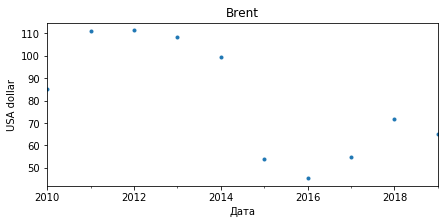

In [26]:
_ = brent_data_y_mean['Значение'].plot( style='.', figsize=( 7, 3 ), title='Brent')
plt.ylabel('USA dollar')
plt.show()

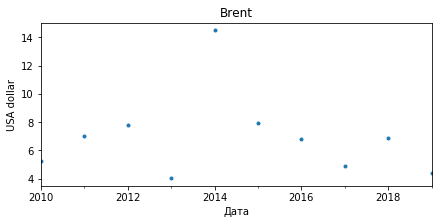

In [27]:
_ = brent_data_y_std['Значение'].plot( style='.', figsize=( 7, 3 ), title='Brent')
plt.ylabel('USA dollar')
plt.show()

## Задание № 5

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

Произошло сглаживание графиков и потеря детализации.